In [18]:
#import libraries
from tensorflow import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras import backend as K

import cv2
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# split data train and test
(x_train,y_train), (x_test, y_test) = mnist.load_data()


In [20]:
# show the shapes of train and test data
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## How many values are 0-9

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

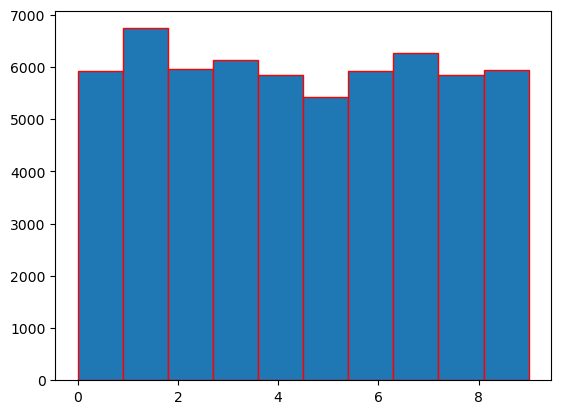

In [44]:

plt.hist(y_train,edgecolor='red')

## Visualize the some Dataset value

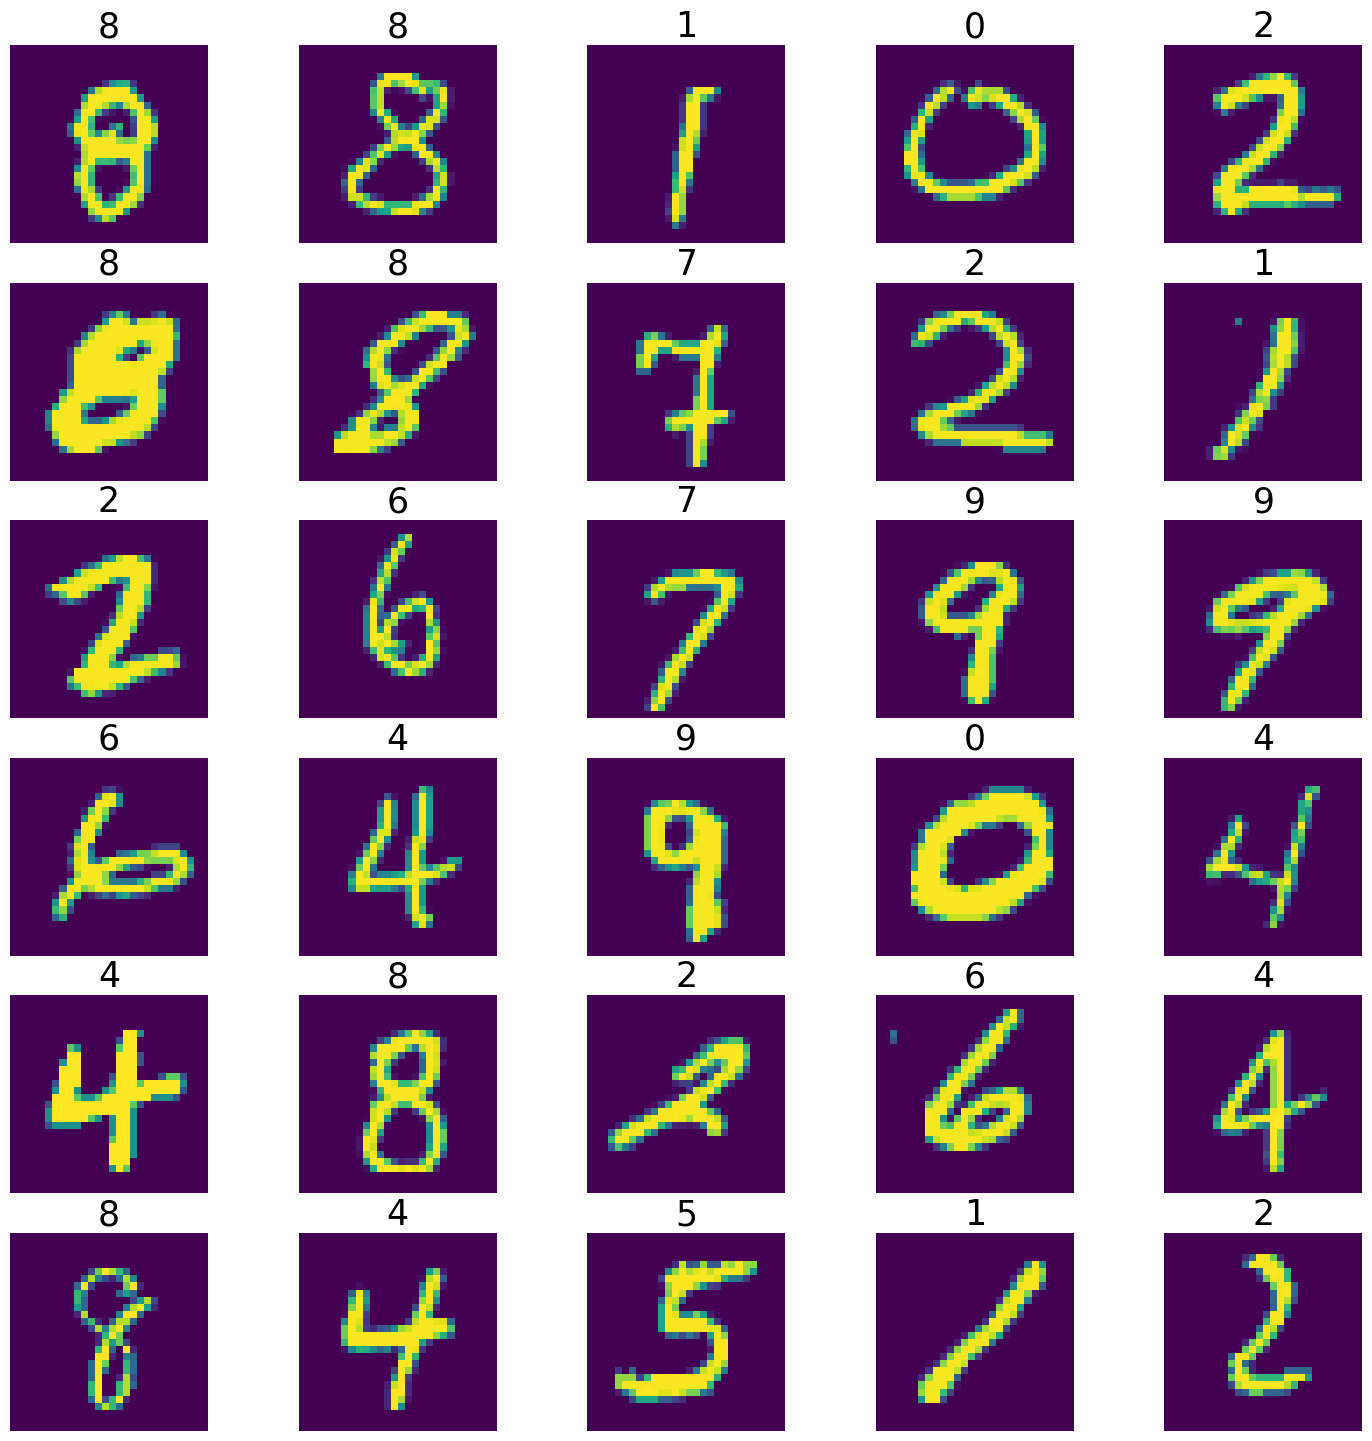

In [48]:
# some value are visualize from train data
fig, axes= plt.subplots(6,5, figsize=(18,18))
axes= axes.flatten()
idx= np.random.randint(0,60000,size=30)
for i in range(30):
    axes[i].imshow(x_train[idx[i],:].reshape(28,28))
    axes[i].axis('off') #hide the axis ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='k',fontsize=25)
    
plt.show()

In [21]:
# reshape the into 28 by 28 X_train,X_test 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [22]:
#encode the output class (one-hot encoding)
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [23]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalizing
x_train /= 255
x_test /= 255

In [24]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
# optimizer
optimizer1 = keras.optimizers.RMSprop(learning_rate=0.001)

### Adding the layers into model

In [26]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer1,metrics=['accuracy'])

## Train the model 

## Train the m

In [27]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10


2023-03-06 14:17:13.830421: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 5s 8ms/step - loss: 0.2482 - accuracy: 0.9238 - val_loss: 0.0623 - val_accuracy: 0.9809
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0814 - accuracy: 0.9749 - val_loss: 0.0448 - val_accuracy: 0.9847
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0392 - val_accuracy: 0.9864
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0330 - val_accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.0302 - val_accuracy: 0.9893
Epoch 8/10
469/46

## Evaluat the model


In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03288278356194496
Test accuracy: 0.9908999800682068


In [28]:
hist.history??

Type:        dict
String form: {'loss': [0.24817173182964325, 0.0813588798046112, 0.05828791856765747, 0.04612501338124275, 0.036858536303043365, 0.03188033774495125, 0.02685249224305153, 0.02209826000034809, 0.021075883880257607, 0.01983412727713585], 'accuracy': [0.923799991607666, 0.9748833179473877, 0.9821000099182129, 0.9854000210762024, 0.9886666536331177, 0.9898499846458435, 0.9916999936103821, 0.9931833148002625, 0.9934499859809875, 0.9936833381652832], 'val_loss': [0.06234346330165863, 0.04476726055145264, 0.03919025883078575, 0.03298816457390785, 0.03110392764210701, 0.028338510543107986, 0.03024095855653286, 0.031469352543354034, 0.03597510606050491, 0.032882802188396454], 'val_accuracy': [0.98089998960495, 0.9847000241279602, 0.9864000082015991, 0.9879999756813049, 0.9900000095367432, 0.9904000163078308, 0.989300012588501, 0.9909999966621399, 0.9901999831199646, 0.9908999800682068]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary i

## Plot the Validation accuracy and Validation loss

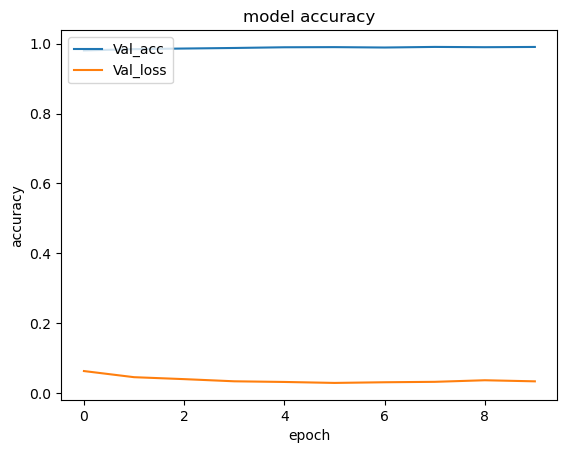

In [31]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Val_acc', 'Val_loss'], loc='upper left')
plt.show()

## Testing the model with unseen image of digit

## 

In [33]:
# img = cv2.imread('/kaggle/input/readingimage/pic.jpg')
img = cv2.imread('/kaggle/input/readingimage/pic.jpg')

## convert into grayscale pixels

In [34]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

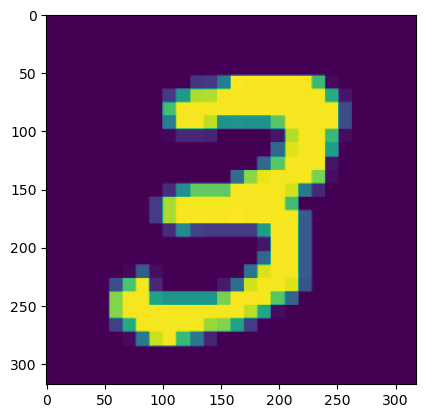

In [35]:
plt.imshow(grayscale);

In [36]:
input_img = cv2.resize(grayscale,(28,28))

input_img_reshape = input_img/255

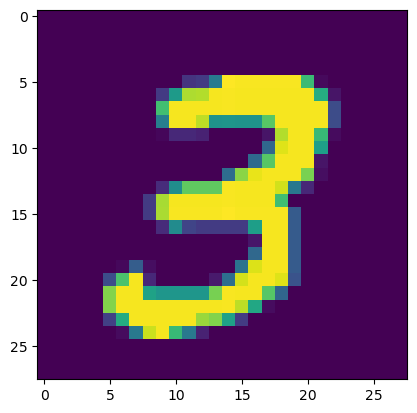

In [37]:
plt.imshow(input_img_reshape);

In [38]:
img_resahped = np.reshape(input_img_reshape,[1,28,28])

## predict value against unseen image

In [39]:
pre=model.predict(img_resahped)[0]

1/1 [==============================] - 0s 118ms/step


## Chose label on high probability

In [40]:
inp_label,acc = np.argmax(pre),max(pre)

In [41]:
print("Model predicted value is : ",inp_label," and with accuracy",acc)

Model predicted value is :  3  and with accuracy 1.0
